# Introduction


**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [6]:
df= pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Define the rows & columns
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Finding the null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Categorical Features


*   sex
*   smoker
*   region



# Exploratory Data Analysis

In [12]:
import warnings
warnings.filterwarnings("ignore")

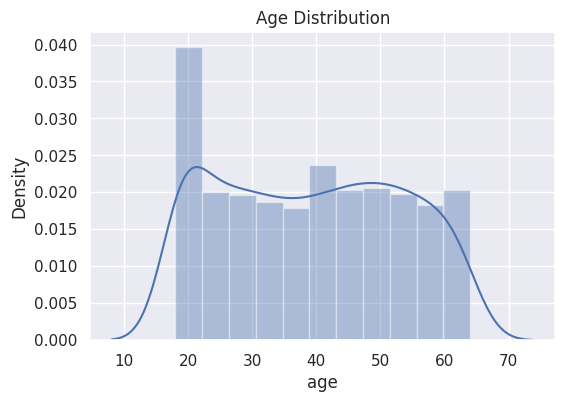

In [25]:
sns.set()
plt.figure(figsize=(6,4))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show();

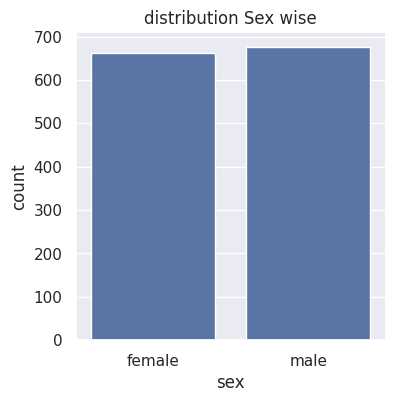

In [16]:
# Gender column
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=df)
plt.title('distribution Sex wise')
plt.show()

In [17]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


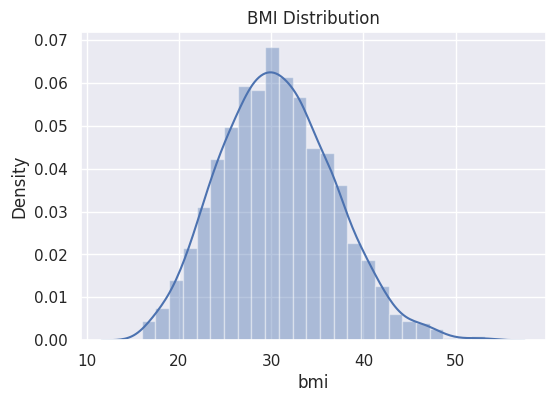

In [24]:
#Bmi Distribution
sns.set()
plt.figure(figsize=(6,4))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show();

Normal BMI Range---> 18.5 to 24.5

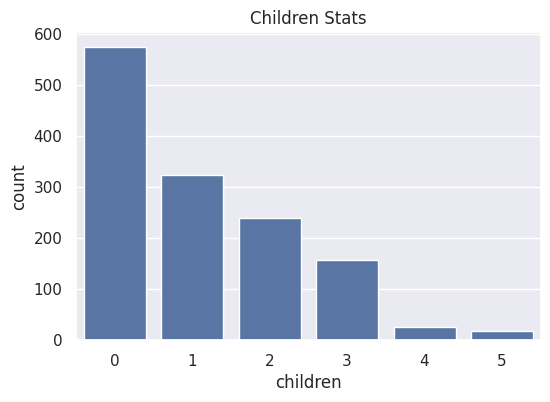

In [28]:
# Children Column
plt.figure(figsize=(6,4))
sns.countplot(x='children', data=df)
plt.title('Children Stats')
plt.show()

In [26]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


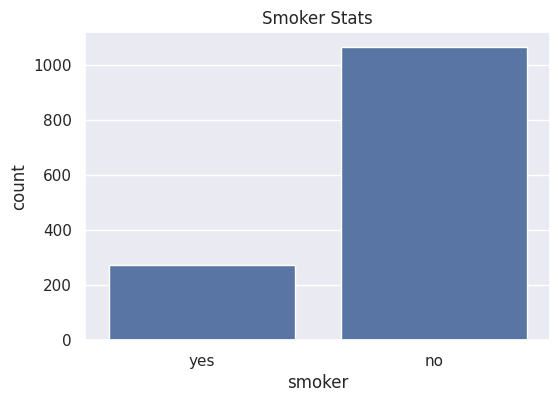

In [29]:
# Smoker Column
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Stats')
plt.show()

In [30]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


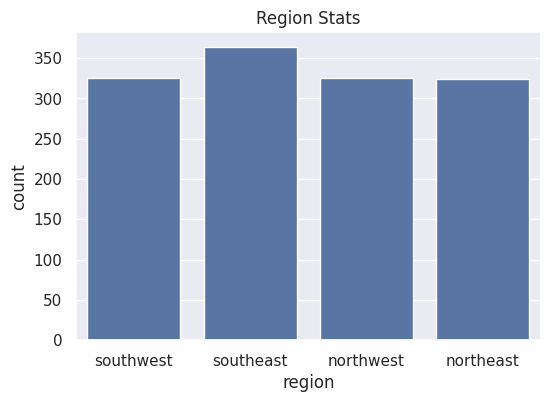

In [31]:
# Region
plt.figure(figsize=(6,4))
sns.countplot(x='region', data=df)
plt.title('Region Stats')
plt.show()

In [32]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


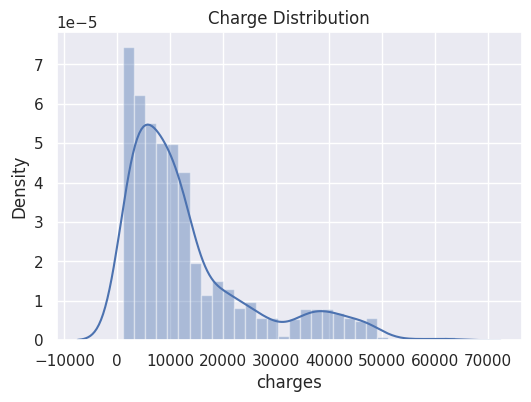

In [39]:
# Charge Distribution
plt.figure(figsize=(6,4))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show()

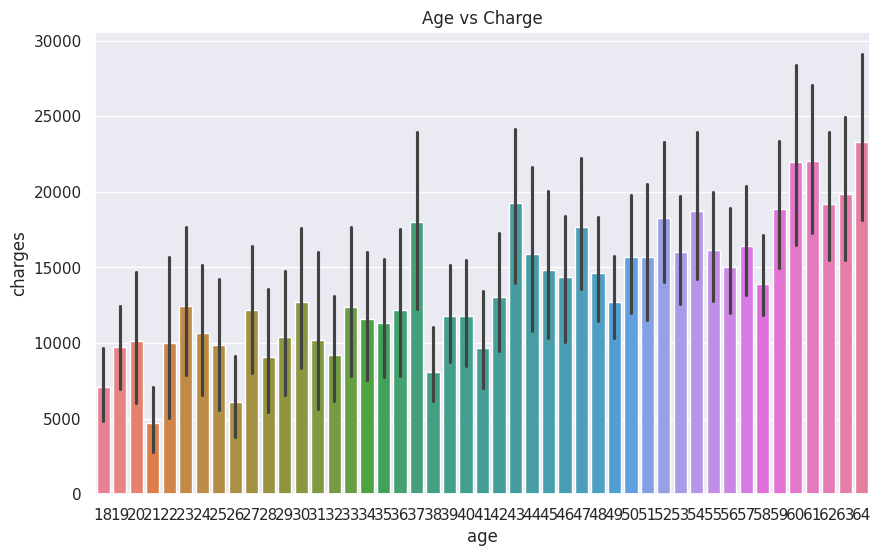

In [41]:
plt.figure(figsize=(10,6))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.show()

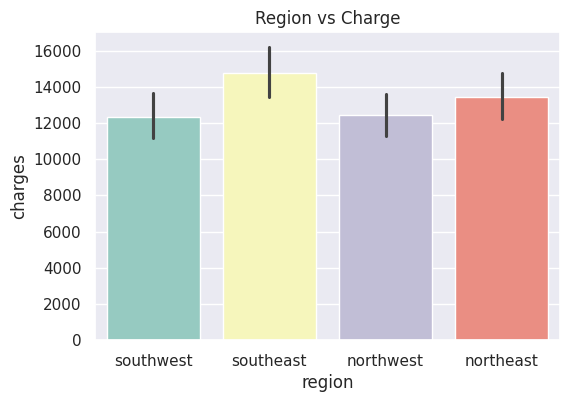

In [43]:
# Region vs Charges
plt.figure(figsize=(6,4))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='Set3')
plt.show()

Text(0.5, 1.0, 'BMI VS Charge')

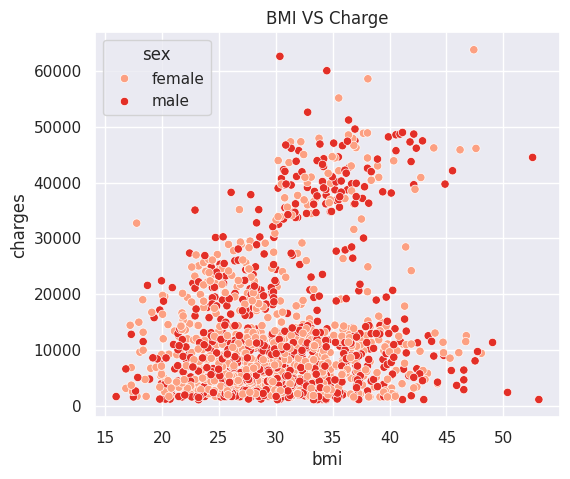

In [45]:
#BMI vs Charge

plt.figure(figsize=(6,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

# Data Preprocessing

**Encoding Categorical Column**

In [48]:
# Encoding sex
df.replace({'sex': {'male' : 0 , 'female' : 1}}, inplace= True )

# Encoding Smoker
df.replace({'smoker': {'no': 1 , 'yes' : 0}}, inplace= True)

# Encoding Region
df.replace({'region' : {'northwest':3, 'northeast':2,'southeast':0,'southwest':1}}, inplace= True)


In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


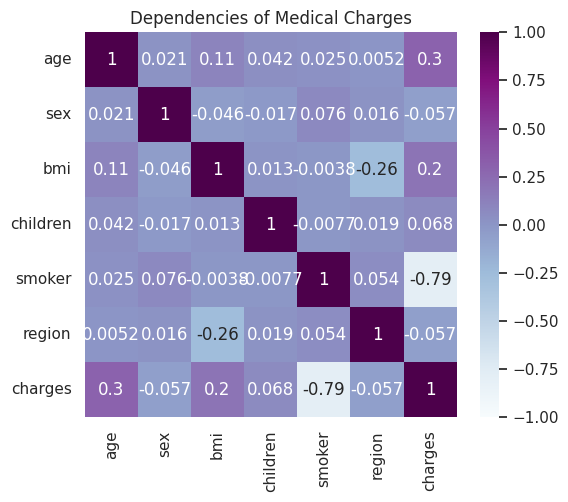

In [61]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr,cmap='BuPu',annot=True,vmin=-1, vmax=1)
plt.title("Dependencies of Medical Charges")
plt.show()

# Model Building

**Define Target & Features**

In [64]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [65]:
X= df.drop(columns='charges', axis=1)
y= df['charges']

**Train test Split**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)

**Model selection**

**Linear regression**

In [69]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(X_test)

**Model evaluation**

In [75]:
# prediction on training data
training_prediction= lr.predict(X_train)

In [79]:
# R squared value
from sklearn.metrics import r2_score
from sklearn import metrics
r2_train= metrics.r2_score(y_train,training_prediction)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [81]:
# Prediction on Test Data
test_data_prediction =lr.predict(X_test)

In [82]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


**Building a Prediction System**

In [86]:
input_data = (30,0,25.74,0,1,2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3907.00314944]
The insurance cost is USD  3907.0031494444065
